In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import csv
import os

In [3]:
%matplotlib inline

In [6]:
log_dicts = sorted(glob.glob('logs_fro*/'), key= lambda x:int(x.split('_')[-1].split('/')[0]))

In [7]:
def read_to_dict(file_name):
    res_dict = {}
    keym = {}
    with open(file_name, newline='') as csvfile:
        csv_reader = csv.reader(csvfile, delimiter=',')
        for i, row in enumerate(csv_reader):
            if i == 0:
                for j, rr in enumerate(row):
                    res_dict[rr] = []
                    keym[j] = rr
            else:
                for j, rr in enumerate(row):
                    res_dict[keym[j]].append(float(rr))
    return res_dict

In [35]:
train_res_dict = {}
val_res_dict = {}
test_res_dict = {}
in_test_res_dict = {}

for logd in log_dicts:
    keym = {}
    train_res_dict[logd] = read_to_dict('{}train_eval.csv'.format(logd))
    val_res_dict[logd] = read_to_dict('{}val_eval.csv'.format(logd))
    test_res_dict[logd] = read_to_dict('{}test_eval.csv'.format(logd))
    if os.path.isfile('{}id_val_eval.csv'.format(logd)):
        in_test_res_dict[logd] = read_to_dict('{}id_val_eval.csv'.format(logd))

In [34]:
#for logd in train_res_dict:
#    train_res_dict[logd]['global_batch'] = np.max(train_res_dict[logd]['batch'])*np.array(train_res_dict[logd]['epoch']) + np.array(train_res_dict[logd]['batch'])

In [36]:
conf_map = {}
i = 0
for ws  in [-1, 2]:
    for dire in ["True", "False"]:
        for samp in ["True", "False"]:
            for rd_t in range(4):
                conf_map[i] = ([-1,2].index(ws),["True", "False"].index(dire),["True", "False"].index(samp), list(range(4)).index(rd_t))
                i+=1

In [44]:
conf_map

{0: (0, 0, 0, 0),
 1: (0, 0, 0, 1),
 2: (0, 0, 0, 2),
 3: (0, 0, 0, 3),
 4: (0, 0, 1, 0),
 5: (0, 0, 1, 1),
 6: (0, 0, 1, 2),
 7: (0, 0, 1, 3),
 8: (0, 1, 0, 0),
 9: (0, 1, 0, 1),
 10: (0, 1, 0, 2),
 11: (0, 1, 0, 3),
 12: (0, 1, 1, 0),
 13: (0, 1, 1, 1),
 14: (0, 1, 1, 2),
 15: (0, 1, 1, 3),
 16: (1, 0, 0, 0),
 17: (1, 0, 0, 1),
 18: (1, 0, 0, 2),
 19: (1, 0, 0, 3),
 20: (1, 0, 1, 0),
 21: (1, 0, 1, 1),
 22: (1, 0, 1, 2),
 23: (1, 0, 1, 3),
 24: (1, 1, 0, 0),
 25: (1, 1, 0, 1),
 26: (1, 1, 0, 2),
 27: (1, 1, 0, 3),
 28: (1, 1, 1, 0),
 29: (1, 1, 1, 1),
 30: (1, 1, 1, 2),
 31: (1, 1, 1, 3)}

3 (0, 0, 0, 3)
7 (0, 0, 1, 3)
11 (0, 1, 0, 3)
15 (0, 1, 1, 3)


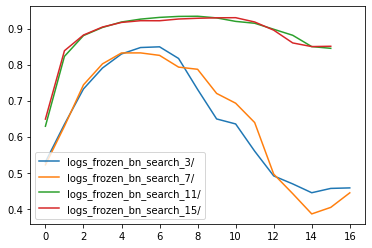

In [49]:
for i, logd in enumerate(train_res_dict):
    if i not in [3,7,11,1]:
        continue
    print(i, conf_map[i])
    plt.plot(np.array(train_res_dict[logd]['epoch']), train_res_dict[logd]['acc_avg'], label=logd)
plt.legend()

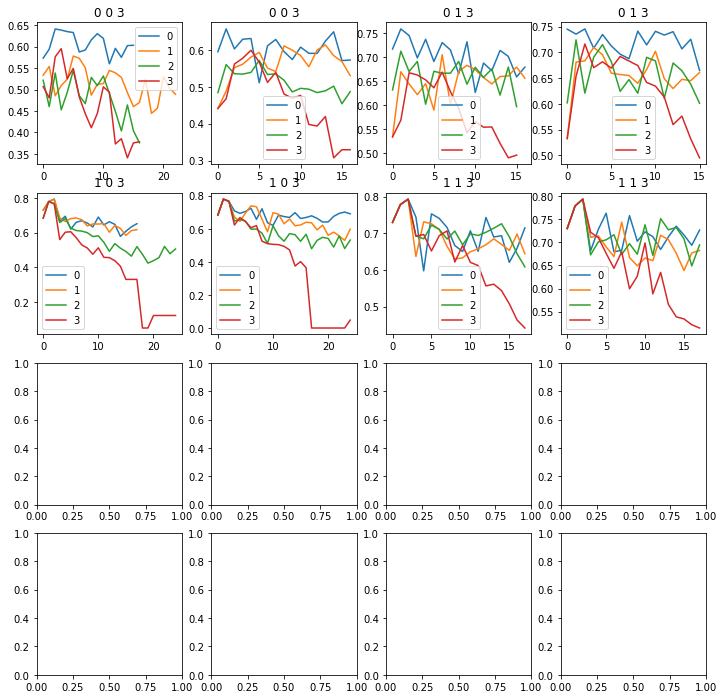

In [73]:
muls = [2,2,2,4]
fig, axs = plt.subplots(4, 4,figsize=(12,12))
M = test_res_dict
for i, logd in enumerate(train_res_dict):
    co = conf_map[int(logd.split('/')[-2].split('_')[-1])]
    # plotting direction 
    # 0 pid = co[1]*muls[2]*muls[3]+co[2]*muls[3]+co[3]
    # pid = co[0]*muls[2]*muls[3]+co[2]*muls[3]+co[3]
    # 2 pid = co[0]*muls[1]*muls[3]+co[1]*muls[3]+co[3]
    #print(i, co[1])
    #if co[1] == 1:
    #    print("cat logs_frozen_bn_search_{}/log.txt |grep direction".format(i))
    pid = co[0]*muls[1]*muls[2]+co[1]*muls[2]+co[2]
    axs[pid//4, pid%4].plot(M[logd]['epoch'], M[logd]['acc_avg'], label="{}".format(co[3]))
    axs[pid//4, pid%4].legend()
    axs[pid//4, pid%4].set_title("{} {} {}".format(co[0],co[1],co[3]))

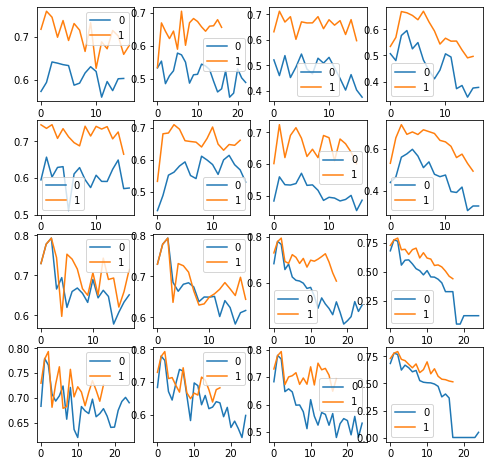

In [59]:
muls = [2,2,2,4]
fig, axs = plt.subplots(4, 4,figsize=(8,8))
for i, logd in enumerate(train_res_dict):
    co = conf_map[int(logd.split('/')[-2].split('_')[-1])]
    # plotting direction 
    # 0 pid = co[1]*muls[2]*muls[3]+co[2]*muls[3]+co[3]
    # pid = co[0]*muls[2]*muls[3]+co[2]*muls[3]+co[3]
    # 2 pid = co[0]*muls[1]*muls[3]+co[1]*muls[3]+co[3]
    #print(i, co[1])
    #if co[1] == 1:
    #    print("cat logs_frozen_bn_search_{}/log.txt |grep direction".format(i))
    pid = co[0]*muls[2]*muls[3]+co[2]*muls[3]+co[3]
    axs[pid//4, pid%4].plot(test_res_dict[logd]['epoch'], test_res_dict[logd]['acc_avg'], label="{}".format(co[1]))
    axs[pid//4, pid%4].legend()

In [31]:
test_res_dict[logd].keys()

dict_keys(['epoch', 'acc_avg', 'recall-macro_all', 'F1-macro_all'])

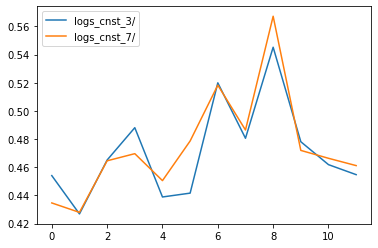

In [46]:
for i, logd in enumerate(train_res_dict):
    if not i%4 == 3:
        continue
    plt.plot(in_test_res_dict[logd]['epoch'], in_test_res_dict[logd]['acc_avg'], label=logd)
plt.legend()